In [2]:
import matplotlib.pyplot as plt
import numpy as np
import wave
from random import sample


# Plotting

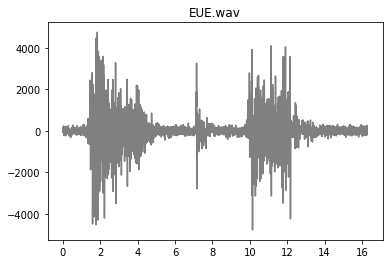

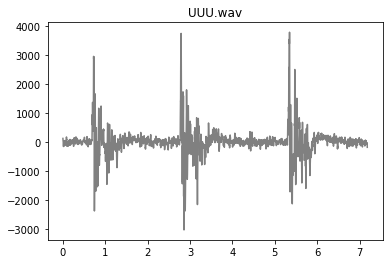

In [54]:
def plot_wave(path):
    path = str(path)
    spf = wave.open(path, "r")
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, np.int16)
    fs = spf.getframerate()

    Time = np.linspace(0, len(signal) / fs, num=len(signal))

    plt.figure(1)
    title = str(path.split("arm_signal/")[-1])
    plt.title(title)
    plt.plot(Time, signal, color = 'gray')
    plt.show()

plot_wave("/Users/martinhuang/Desktop/OneDrive/2022/2022 Sem 1/DATA3888/Brain 5/Brain/arm_signal/EUE.wav")
plot_wave("/Users/martinhuang/Desktop/OneDrive/2022/2022 Sem 1/DATA3888/Brain 5/Brain/arm_signal/UUU.wav")

# Classifier

In [37]:

def movement_classifier(data, time, down_sample_rate = 100, window_size = 0.3, threshold_events = 50):
    # able to modify these
    # window_size = 0.3 # could be 0.5, try all.
    # threshold_events = 50 # we can try 20
    # down_sample_rate = 50 # we can try 50 here aswell

    # 1. Down Sampling
    ind = np.arange(0, np.where(np.round(time,4) == round(time[len(time) - 1] - window_size, 4))[0][0], down_sample_rate)

    t_stat = [0]*len(ind)


    # 2. Calculating SD
    array = result = [] 

    for i in range(len(ind)):
        data_subset = data[ind[i] : ind[i] + int(window_size * down_sample_rate)]
        t_stat[i] = np.std(data_subset)

    # 3. Use threshold to determine movement intervals
    predicted_event = [x for x in range(len(t_stat)) if t_stat[x] < threshold_events]

    # time vector for middle of each window 
    time_middle = []
    for i in predicted_event:
        time_middle.append(time[ind[i]] + window_size/2)

    # 4. Estimation 
    intervals = [] 
    cut_point = predicted_event[0]

    middle_time = int(down_sample_rate * window_size/2)
    for i in range(len(predicted_event) - 1):
        if predicted_event[i+1] != predicted_event[i] + 1:
            intervals.append((int(ind[cut_point] + middle_time)/10000, int(ind[predicted_event[i]] + middle_time)/10000))
            cut_point = predicted_event[i+1]
    intervals.append((int(ind[cut_point] + middle_time)/10000, int(ind[predicted_event[-1]] + middle_time)/10000))

    return intervals

# Preparing Wave File

In [11]:
def prep_wave(path):
    path = str(path)
    spf = wave.open(path, "r")
    signal = spf.readframes(-1)
    signal = np.frombuffer(signal, np.int16)
    fs = spf.getframerate()

    time = np.linspace(0, len(signal) / fs, num=len(signal))
    return signal, fs, time 

In [43]:
signal,fs,time = prep_wave("/Users/martinhuang/Desktop/OneDrive/2022/2022 Sem 1/DATA3888/Brain 5/Brain/arm_signal/EEU.wav")
intervals = movement_classifier(signal, time = time, down_sample_rate = 100, window_size = 0.5, threshold_events = 50)
print(intervals)

[(0.0025, 14.1525)]


In [46]:
spf1 = wave.open("/Users/martinhuang/Desktop/OneDrive/2022/2022 Sem 1/DATA3888/Brain 5/Brain/arm_signal/EEU.wav", 'r')
signal1 = spf1.readframes(-1)
signal1 = np.frombuffer(signal, np.int16)
fs = spf1.getframerate()

time = np.linspace(0, len(signal) / fs, num=len(signal))

intervals = movement_classifier(signal, time = time, down_sample_rate = 102, window_size = 0.5, threshold_events = 50)
print(intervals)

[(0.0025, 14.1499)]
